# Projet :   Analyse de données <span style='color:Blue'> Twitter  </span> : Python pour la data-science 🐍🗃️

#### Auteurs : Ambroise Bouru, Juliette Veillon, Florent Le Clerc

Ce projet a été effectué dans le cadre de l'unité d'enseignement "Python pour la data-science" dispensé à l'ENSAE. Conformément aux attendus de cet enseignement, ce projet est divisé en trois parties : une partie "récupération et traitement des données", une partie "modélisation", ainsi qu'une partie "analyse descriptive et représentation graphique".

<br /><br />

## Problématique

Dans ce projet, nous tenterons de répondre à la problématique suivante : **Dans quelle mesure l'analyse de cluster de graphes permet-elle de mettre en évidence des caractéristiques propres à différents groupes d'utilisateurs de Twitter ?**

Afin de répondre à cette problématique, nous avons utilisé un jeu de données volontairement très spécifique, à savoir l'ensemble des utilisateurs français ayant tweeté sur le match 🇦🇷 - 🇭🇷 ayant eu lieu le mardi 13 décembre.

Le jeu de données obtenus, contenant environ 9000 tweets, nous a permis de réaliser une modélisation pertinente sans que cela ne pose de problème en terme de temps d'exécution.

<br />

### I. Récupération et traitement des données

La récupération des données s'est faite à l'aide de l'API 2.0 et de l'API 1.0 de Twitter. Ces deux API sont mises à disposition gratuitement par Twitter, mais l'API 1.0 demande un approbation de la part de Twitter. (https://developer.twitter.com/en/docs/api-reference-index).

La manipulation des requêtes de ces deux API s'est faite via le module "twitter" de Python, permettant de récupérer facilement les jeux de données directement sur Python.

Grâce à cette API, nous avons tout d'abord extrait les tweets et les utilisateurs ayant tweeté durant ce match, et exporté les résultats dans deux fichiers json distincts. En particulier, le fichier json des utilisateurs comporte l'intégralité des ids des personnes ayant tweeté durant ce match. 

Grâce à cela, dans un deuxième temps, pour chaque personne ayant tweeté, nous avons de nouveau utilisé l'API pour extraire tous les following de cette personne. Ces requêtes ont été ensuite sauvegardées sous la forme d'un dictionnaire, dans lequel les clés correspondent aux ids des personnes ayant tweetés durant le match, et comme seul valeur la liste des ids des followings de cette personne.


<br />

### II. Modélisation

Le dictionnaire créé dans la partie I nous a ensuite permis de construire le graphe des relations. En effet, nous avons considéré que le choix le plus pertinent pour que deux noeuds soient en relation (le graphe est non-orienté) est que l'une des deux personnes follow l'autre.

Une fois le graphe créé, nous avons réalisé le clustering de ce graphe à l'aide de trois algorithmes différents. Le clustering, comme étudié en cours, permet de créer des clusters d'observations, tels que les observations sont homogènes au sein de chaque cluster, et hétérogènes entre les différents clusters.

En revanche, les algorithmes de clustering ne s'appliquent pas au même type de jeu de données que ceux étudiés en cours. En effet, dans le cours, nous avons créé des clusters censés regrouper des groupes d'individus ayant des caractéristiques socio-économiques similaires. Ici, le problème est tout à fait différent. En effet, le seul critère pour créer des clusters sont ici les relations entre individus. Les personnes au sein de chaque cluster sont donc censées être des personnes qui se follow les unes les autres.

Ces trois algorithmes, présentés plus en détail dans le notebook correspondant, sont les algorithmes de Louvain, de clustering spectral et de propagation d'étiquettes. Ce sont les trois algorithmes implementés dans le module scikit-network, un package spécialisé dans l'étude des graphes. Les algorithmes de Louvain et de propagation d'étiquettes sont encore une fois relativement différents des algorithmes étudiés en cours, dans la mesure où, contrairement à l'algorithme de clustering spectral, on ne peut pas spécifier le nombre de clusters souhaités. Ainsi, ces deux algorithmes renvoient tous deux environ 1000 clusters sur un jeu de données de 9000 utilisateurs.

La représentation à l'aide du module pyvis du clustering obtenu via l'algorithme de Louvain (chaque couleur correspondant à un cluster différent) est présente ci-dessous.

<br />

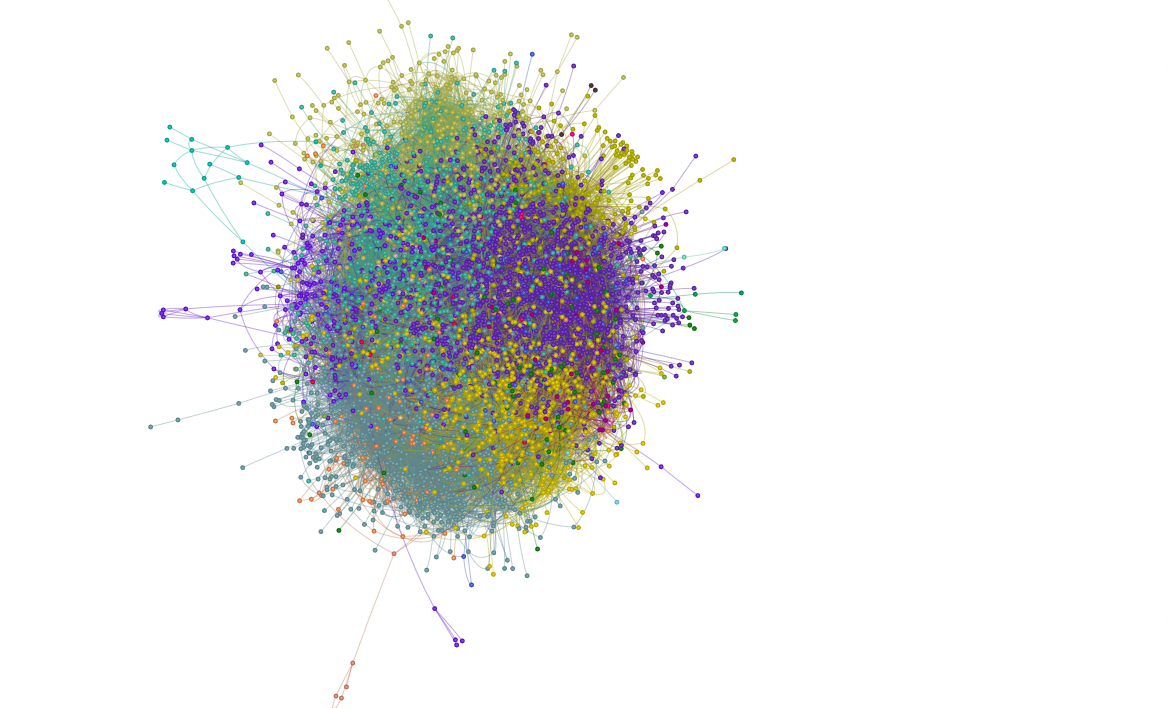

<br />

Les résultats obtenus nous ont permis de conclure que l'algorithme le plus pertinent dans le cadre de notre projet est l'algorithme _ .

<br />

### III. Analyse des données

Grâce au clustering effectué dans la partie précédente, nous avons pu étudier les similarités présentes dans chacun des clusters. Les caractéristiques que nous avons souhaitées étudier sont, dans un premier temps, le texte des tweets au sein de chaque cluster, puis, dans un second temps, les autrescaractéristiques des tweets - likes, retweets,...

Afin de représenter ce à quoi ressemblent les tweets au sein de chaque cluster, nous avons décidé de réaliser un histogramme des lemmes les plus présents, ainsi qu'une représentation sous forme de nuages de mots (comme étudié en cours).

La représentation sous forme de nuages de mots de l'intégralité des tweets récupérés est disponible ci-dessous.

<br />

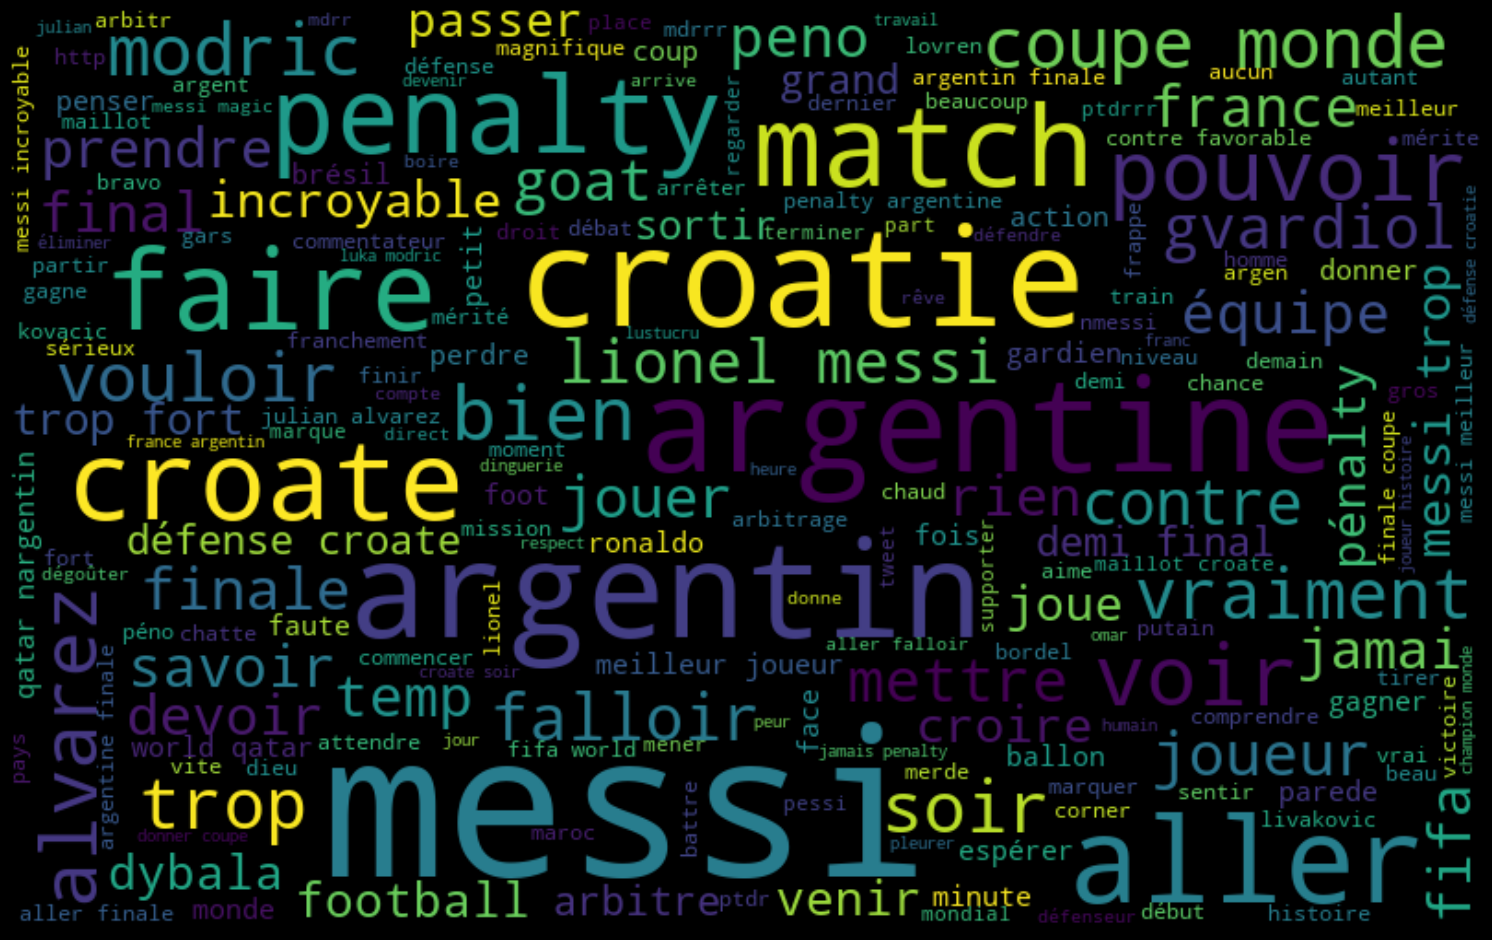